In [61]:
# Passo 1: Importando Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import h5py
import PIL
import scipy
from scipy import ndimage

In [62]:
# Passo 2: Montando Pasta do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# Passo 3: Função para carregar o dataset
def load_dataset():
    train = h5py.File('/content/drive/My Drive/datasets/train_catvnoncat.h5', "r")
    X_train = np.array(train["train_set_x"][:]) # X_treino
    y_train = np.array(train["train_set_y"][:]) # y_treino

    test = h5py.File('/content/drive/My Drive/datasets/test_catvnoncat.h5', "r")
    X_test = np.array(test["test_set_x"][:]) # X_teste
    y_test = np.array(test["test_set_y"][:]) # y_teste

    classes = np.array(test["list_classes"][:]) # Lista de Classes (Rotulos)

    return X_train, y_train, X_test, y_test, classes

In [64]:
# Passo 5: Carrega os dados (cat/non-cat)
X_train, y_train, X_test, y_test, classes = load_dataset()

In [65]:
# Passo 6: Imprimindo o shape atual do X_train e X_teste
print("Shape do X_treino: {}".format(X_train.shape))
print("Shape do y_treino: {}".format(y_train.shape))
print("Shape do X_teste: {}".format(X_test.shape))
print("Shape do y_teste: {}".format(y_test.shape))

Shape do X_treino: (209, 64, 64, 3)
Shape do y_treino: (209,)
Shape do X_teste: (50, 64, 64, 3)
Shape do y_teste: (50,)


In [66]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [67]:
print("Shape do X_treino: {}".format(X_train.shape))
print("Shape do y_treino: {}".format(y_train.shape))
print("Shape do X_teste: {}".format(X_test.shape))
print("Shape do y_teste: {}".format(y_test.shape))

Shape do X_treino: (209, 12288)
Shape do y_treino: (209,)
Shape do X_teste: (50, 12288)
Shape do y_teste: (50,)


In [68]:
X_train = X_train/255.
X_test = X_test/255.

In [69]:
from sklearn.linear_model import LogisticRegression

# Organiza os dados no formato do framework sklearn

# Cria um modelo de regressao logistica e o treina com os dados (X, y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = logreg.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [72]:
print(cm)

[[12  5]
 [10 23]]


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

  b'non-cat'       0.55      0.71      0.62        17
      b'cat'       0.82      0.70      0.75        33

    accuracy                           0.70        50
   macro avg       0.68      0.70      0.68        50
weighted avg       0.73      0.70      0.71        50



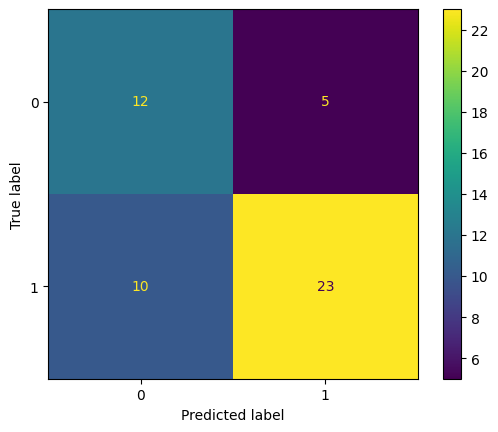

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()